1. 패키지 설치

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# K-NN 분류를 위한 패키지
from sklearn.neighbors import KNeighborsClassifier

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 분류 결과 판정을 위한 패키지
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# 경고메세지 출력 방지
import warnings
warnings.filterwarnings('ignore')

2. 데이터 가져오기 및 확인

In [15]:
origin = pd.read_excel('./iris.xlsx')
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


3. 데이터 분포 확인

- 1 Sepal

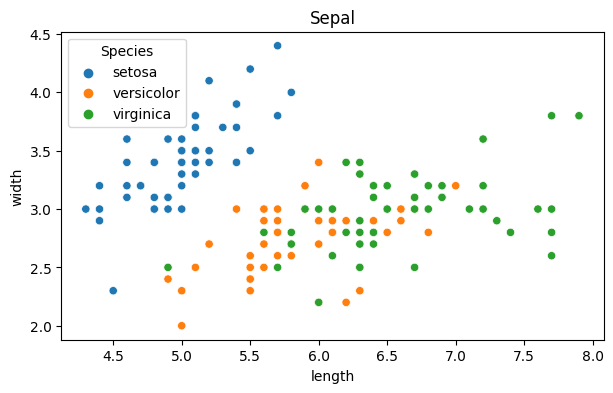

In [16]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin,x='Sepal.Length', y='Sepal.Width', hue='Species')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Sepal')

plt.show()
plt.close()

- Petal

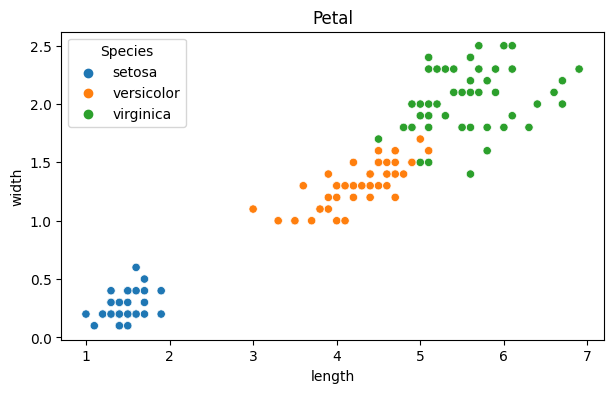

In [17]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin,x='Petal.Length', y='Petal.Width', hue='Species')
plt.xlabel('length')
plt.ylabel('width')
plt.title('Petal')

plt.show()
plt.close()

- 산점도 행렬

<Figure size 1500x1000 with 0 Axes>

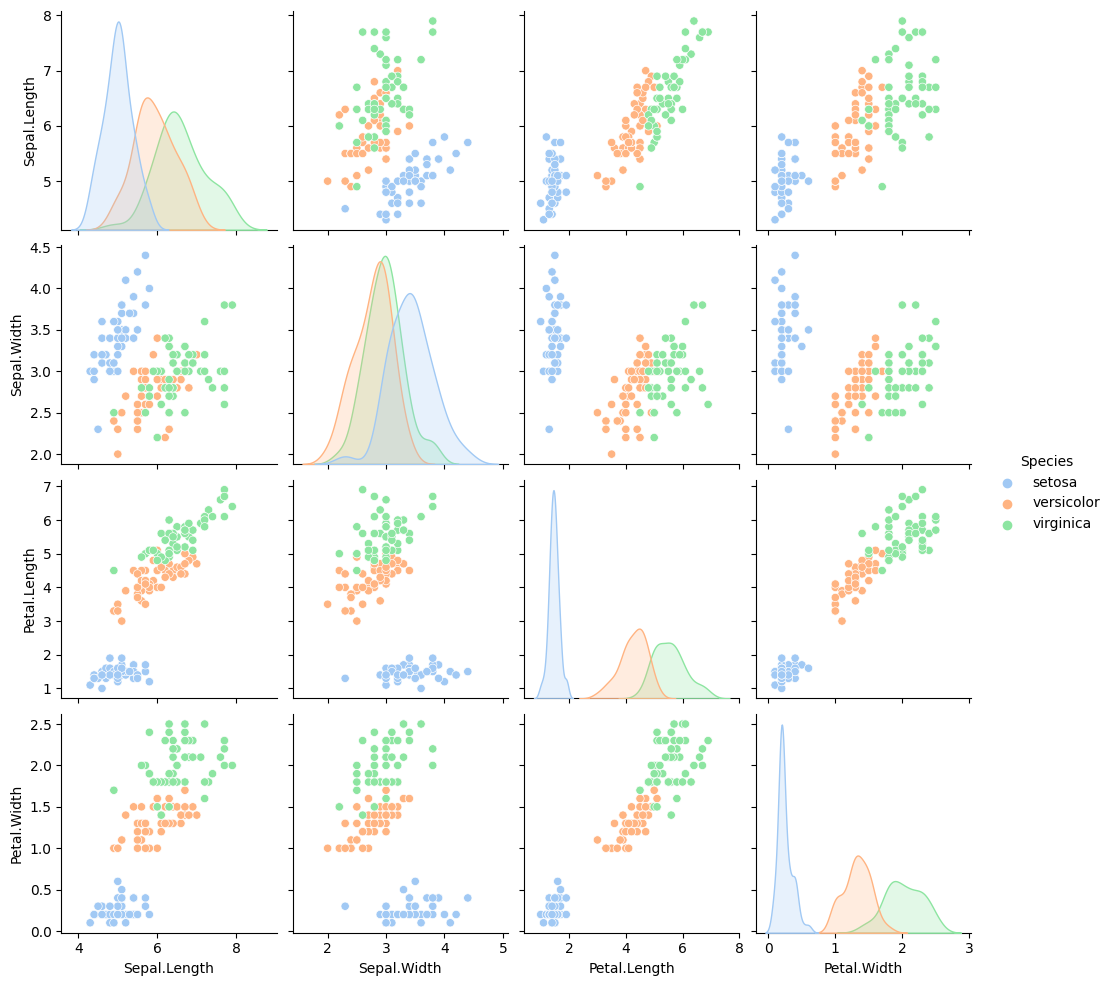

In [18]:
plt.figure(figsize=(15,10))
sb.pairplot(data=origin, hue='Species', palette='pastel')
plt.show()
plt.close()

> seaborn : 'scatterplot', 'regplot', 'pairplot'

- scatterplot : hue 파라미터 X, 그래프 자체적 추세선 지원하지 않음 => 군집/군류
- regplot : hue 파라미터 X, 추세선 지원. => 회귀
- pairplot:

4. K-NN 분류 모델 구성

종속변수 확인 및 라벨링

In [19]:
# origin['Species'].value_counts()

In [20]:
# labels = {'setosa':0, 'versicolor':1, 'virginica':2}
# labels

결과 출력을 위한 라벨 역 정의

In [21]:
# classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
# classes

라벨링

In [22]:
# df = origin.copy()
# df['Species'] = df['Species'].map(labels)
# df.head()

In [23]:
# 종속변수 라벨링
df = origin.copy()
df['Species'] = df['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
# 종속변수와 독립변수 분리
x = df.drop('Species', axis=1)
y = df[['Species']]

In [25]:
# 독립변수 표준화
scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x_df = pd.DataFrame(std_x)
std_x_df.rename(columns={0:'Sepal.Length', 1:'Sepal.Width', 2:'Petal.Length', 3: 'Petal.Width'},inplace=True)
std_x_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [26]:
# 모델 구성 및 학습
k = 5 #보통 독립변수의 +1

# 모델 구성
knn = KNeighborsClassifier(n_neighbors=k)

#모델 학습
fit = knn.fit(std_x_df, y)
fit

KNeighborsClassifier()

> 하이퍼파라미터 : 개발자가 직접 넣어주어야 하는 파라미터

In [27]:
# 학습결과 확인
y_pred = knn.predict(std_x_df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

5. 새로운 데이터 투입

In [28]:
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성해야한다.
Sepal_length = [4.5]	
Sepal_width = [4.0]
Petal_length = [5.0]	
Petal_width = [5.5]

new_data = [[Sepal_length[0], Sepal_width[0], Petal_length[0], Petal_width[0]]]
std_new_data = scaler.fit_transform(new_data)

Species_classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
new_pred = knn.predict(std_new_data)

print('데이터: ', std_new_data, '예측:', Species_classes[new_pred[0]])

데이터:  [[0. 0. 0. 0.]] 예측: versicolor


6. k-nn에서 이웃한 데이터 얻기

In [29]:
dist, indexs = knn.kneighbors(std_new_data, k)
#거리
print("거리:", dist)
#인덱스
print("인덱스:", indexs)

거리: [[0.33270738 0.39961763 0.49181538 0.49194035 0.49368691]]
인덱스: [[95 88 61 96 64]]


7. 이웃의 실 데이터 확인

In [30]:
neighbor_data = origin.values[indexs]
neighbor_data

array([[[5.7, 3.0, 4.2, 1.2, 'versicolor'],
        [5.6, 3.0, 4.1, 1.3, 'versicolor'],
        [5.9, 3.0, 4.2, 1.5, 'versicolor'],
        [5.7, 2.9, 4.2, 1.3, 'versicolor'],
        [5.6, 2.9, 3.6, 1.3, 'versicolor']]], dtype=object)

8. 분류 결과 시각화

In [31]:
std_x_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [39]:
std_df = pd.concat([std_x_df, y],axis=1)
std_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


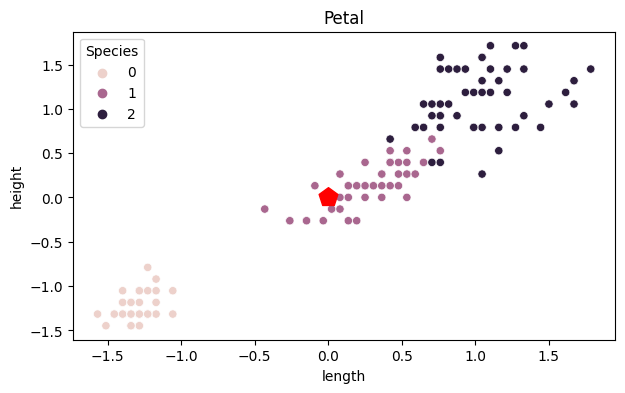

In [41]:
plt.figure(figsize=(7,4))

sb.scatterplot(data=std_df, x='Petal.Length',y='Petal.Width', hue='Species')
plt.xlabel("length")
plt.ylabel("height")
plt.title('Petal')

#새로운 데이터 투입
new_data_length = std_new_data[0][2] 
new_data_width = std_new_data[0][3]
plt.scatter(new_data_length, new_data_width, marker='p', s=200, c='r', label='neighbor')

plt.show()
plt.close()